In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import ContinuousSpace
import mesa
from mesa.datacollection import DataCollector
import numpy as np
from statistics import mean 
import pandas as pd
import collections




In [3]:
def flatten(x):
    if isinstance(x, collections.Iterable):
        return [a for i in x for a in flatten(i)]
    else:
        return [x]

In [4]:


class MyAgent(Agent):
    
    def __init__(self, name, model,pos, state=None,dest=None, choi= None):
        super().__init__(name, model)
        self.name = name
        self.pos= pos
        self.state=state
        self.neigh=None
        self.neigh_names=None
        self.neigh_state=None
        self.heading=None
        self.dest=dest
        self.choices = choi
        self.posl1=None

    def neigh_namer(self, neigh):
        me = self.name
        them = (n.name for n in neigh)
        Names = []
        for other in them:
            Names.append(other)
        return Names
    def neigh_stater(self, neigh):
        sts = (n.state for n in neigh)
        States = []
        for st in sts:
            States.append(st)
        return States
    def state_adjuster(self, neigh):
        mine = self.state
        their = (n.state for n in neigh)
        interactions = []
        if len (neigh)>0:
            for other_st in their:
                if other_st > mine:
                    interactions.append(other_st)
                else:
                    interactions.append(mine)
        else:
            interactions=[mine,mine]
        return round(mean(flatten(interactions)))
    def dest_adjuster(self):
        m1 = self.heading
        if m1==(0,0):
            kk=np.array([[100,100],[50,50],[100,10],[10,10],[10,100]])
            jj=kk[np.random.choice(len(kk),1)]
            m2=np.array((jj[0][0],jj[0][1]))
        else:
            m2=self.dest
        return m2
    def step(self):
        
        neigh = self.model.space.get_neighbors(self.pos, 3, False)
        self.neigh=neigh
        self.state=self.state_adjuster(neigh)
        self.neigh_names=self.neigh_namer(neigh)
        self.neigh_state=self.neigh_stater(neigh)
        self.heading=self.model.space.get_heading(self.pos, self.dest)
        self.posl1=self.pos
        self.dest=self.dest_adjuster()
        new_step =[round(x/y) for x, y in zip([ x for x in self.heading], [ abs(x)+0.000001 for x in self.heading])]
        new_pos = (self.pos[0]+new_step[0],self.pos[1]+new_step[1])
        print("{} activated".format(self.name))
        self.model.space.move_agent(self, new_pos)

class MyModel(Model):
    
    def __init__(self, n_agents,xylim=110, prob=0.05,):
        super().__init__()
        self.schedule = RandomActivation(self)
        self.space = ContinuousSpace(xylim, xylim, torus=False)
        for i in range(n_agents):
            pos = (self.random.randrange(0, 100), self.random.randrange(0, 100))
            state=np.random.binomial(1, prob, 1)
            choices=np.array([[100,100],[50,50],[100,10],[10,10],[10,100]])
            choi=choices[np.random.choice(len(choices),1)]
            dest=np.array((choi[0][0],choi[0][1]))
            a = MyAgent(i, self,pos,state, dest,choi)
            self.schedule.add(a)
            self.space.place_agent(a, pos)
            self.state=state
            self.dest=dest
            self.choices=choi
            self.dc = DataCollector(model_reporters={"agent_count":
                                    lambda m: m.schedule.get_agent_count()},
                                #agent_reporters={"neigh": lambda a: [a.neigh, a.name] }
                                agent_reporters={"neigh": lambda a: a.neigh_names,
                                                "name": lambda a: a.name,
                                                "state": lambda a: a.state,
                                                "pos": lambda a: a.pos,
                                                "posl1": lambda a: a.posl1,
                                                "heading": lambda a: a.heading,
                                                "neigh_state": lambda a: a.neigh_state,
                                                "choice": lambda a: a.choices}
                                   )

    def step(self):
        self.schedule.step()
        self.dc.collect(self)

In [5]:
nagent=30
nstep=200

In [6]:
model = MyModel(nagent)
for t in range(nstep):
    model.step()
model_df = model.dc.get_model_vars_dataframe()
agent_df = model.dc.get_agent_vars_dataframe()


model_df

<ipython-input-3-295a632dc915>:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  if isinstance(x, collections.Iterable):


10 activated
19 activated
1 activated
9 activated
13 activated
22 activated
0 activated
21 activated
8 activated
27 activated
20 activated
3 activated
25 activated
26 activated
15 activated
11 activated
7 activated
6 activated
28 activated
24 activated
17 activated
2 activated
14 activated
18 activated
12 activated
16 activated
23 activated
5 activated
4 activated
29 activated
15 activated
0 activated
12 activated
6 activated
16 activated
24 activated
3 activated
21 activated
9 activated
7 activated
8 activated
25 activated
29 activated
26 activated
1 activated
18 activated
13 activated
2 activated
20 activated
27 activated
5 activated
11 activated
23 activated
14 activated
10 activated
19 activated
4 activated
22 activated
17 activated
28 activated
25 activated
18 activated
17 activated
24 activated
3 activated
0 activated
27 activated
28 activated
9 activated
5 activated
29 activated
10 activated
15 activated
11 activated
14 activated
12 activated
4 activated
23 activated
16 activate

16 activated
16 activated
29 activated
4 activated
14 activated
6 activated
24 activated
26 activated
10 activated
5 activated
1 activated
18 activated
2 activated
28 activated
15 activated
23 activated
22 activated
9 activated
20 activated
11 activated
3 activated
0 activated
7 activated
13 activated
27 activated
19 activated
25 activated
21 activated
17 activated
12 activated
8 activated
8 activated
28 activated
29 activated
27 activated
0 activated
20 activated
22 activated
26 activated
16 activated
10 activated
11 activated
14 activated
2 activated
7 activated
12 activated
9 activated
25 activated
18 activated
23 activated
6 activated
4 activated
17 activated
24 activated
3 activated
15 activated
19 activated
13 activated
1 activated
5 activated
21 activated
22 activated
12 activated
29 activated
17 activated
8 activated
16 activated
26 activated
25 activated
11 activated
0 activated
28 activated
4 activated
15 activated
20 activated
3 activated
10 activated
6 activated
13 activate

10 activated
29 activated
27 activated
9 activated
24 activated
20 activated
17 activated
16 activated
18 activated
6 activated
5 activated
17 activated
28 activated
21 activated
15 activated
18 activated
2 activated
8 activated
24 activated
26 activated
1 activated
12 activated
10 activated
29 activated
14 activated
16 activated
0 activated
7 activated
27 activated
22 activated
13 activated
19 activated
6 activated
4 activated
23 activated
3 activated
25 activated
20 activated
9 activated
11 activated
5 activated
5 activated
10 activated
28 activated
12 activated
23 activated
19 activated
3 activated
27 activated
24 activated
11 activated
0 activated
2 activated
14 activated
9 activated
18 activated
4 activated
16 activated
15 activated
6 activated
13 activated
29 activated
17 activated
7 activated
22 activated
25 activated
21 activated
8 activated
1 activated
26 activated
20 activated
12 activated
1 activated
25 activated
17 activated
29 activated
4 activated
18 activated
23 activate

25 activated
27 activated
16 activated
29 activated
3 activated
22 activated
14 activated
23 activated
10 activated
20 activated
6 activated
1 activated
9 activated
4 activated
18 activated
7 activated
29 activated
5 activated
9 activated
28 activated
2 activated
19 activated
14 activated
25 activated
17 activated
11 activated
26 activated
3 activated
24 activated
4 activated
23 activated
22 activated
12 activated
21 activated
13 activated
27 activated
0 activated
15 activated
16 activated
1 activated
10 activated
6 activated
20 activated
8 activated
22 activated
26 activated
10 activated
8 activated
15 activated
0 activated
7 activated
29 activated
3 activated
17 activated
4 activated
9 activated
6 activated
27 activated
24 activated
12 activated
23 activated
13 activated
5 activated
19 activated
1 activated
11 activated
14 activated
16 activated
21 activated
18 activated
25 activated
2 activated
28 activated
20 activated
14 activated
10 activated
6 activated
12 activated
8 activated


20 activated
18 activated
9 activated
12 activated
24 activated
13 activated
15 activated
8 activated
29 activated
11 activated
19 activated
10 activated
14 activated
23 activated
16 activated
1 activated
27 activated
28 activated
24 activated
5 activated
8 activated
9 activated
28 activated
11 activated
23 activated
12 activated
10 activated
13 activated
4 activated
0 activated
15 activated
3 activated
2 activated
27 activated
14 activated
19 activated
17 activated
26 activated
6 activated
1 activated
25 activated
16 activated
18 activated
29 activated
7 activated
20 activated
21 activated
22 activated
9 activated
10 activated
7 activated
14 activated
18 activated
6 activated
13 activated
1 activated
15 activated
29 activated
5 activated
20 activated
22 activated
16 activated
21 activated
12 activated
17 activated
26 activated
27 activated
4 activated
24 activated
3 activated
11 activated
8 activated
28 activated
2 activated
0 activated
23 activated
19 activated
25 activated
11 activa

8 activated
28 activated
20 activated
26 activated
4 activated
10 activated
7 activated
25 activated
18 activated
26 activated
1 activated
14 activated
15 activated
8 activated
11 activated
2 activated
4 activated
5 activated
19 activated
10 activated
16 activated
23 activated
7 activated
9 activated
18 activated
25 activated
12 activated
13 activated
6 activated
21 activated
29 activated
24 activated
3 activated
0 activated
20 activated
22 activated
17 activated
27 activated
28 activated
6 activated
19 activated
21 activated
28 activated
11 activated
29 activated
16 activated
18 activated
12 activated
24 activated
2 activated
4 activated
0 activated
20 activated
10 activated
9 activated
5 activated
8 activated
22 activated
7 activated
25 activated
3 activated
1 activated
14 activated
26 activated
27 activated
15 activated
17 activated
13 activated
23 activated
3 activated
21 activated
4 activated
26 activated
10 activated
14 activated
2 activated
16 activated
28 activated
1 activated


,agent_count
0,30
1,30
2,30
3,30
4,30
...,...
195,30
196,30
197,30
198,30


In [7]:
agent_df

neigh  name  state        pos      posl1     heading neigh_state  \
Step AgentID                                                                    
1    0          []     0      0   (99, 64)   (98, 65)    (2, -55)          []   
     1        [26]     1      0   (74, 57)   (75, 58)  (-65, -48)       [[0]]   
     2          []     2      0   (50, 21)   (51, 20)    (-1, 30)          []   
     3          []     3      0   (47, 35)   (48, 34)   (-38, 66)          []   
     4          []     4      0   (23, 64)   (22, 65)   (78, -55)          []   
...            ...   ...    ...        ...        ...         ...         ...   
200  25        [5]    25      0   (68, 42)   (67, 43)   (33, -33)         [0]   
     26        [7]    26      0   (60, 60)   (61, 61)  (-11, -11)         [0]   
     27         []    27      0  (100, 83)  (100, 82)     (0, 18)          []   
     28         []    28      0   (83, 10)   (84, 10)    (-74, 0)          []   
     29       [22]    29      0   (75, 10)   (76, 10)    (-66, 0)         [0]   

                   choice  
Step AgentID               
1    0        [[100, 10]]  
     1         [[10, 10]]  
     2         [[50, 50]]  
     3        [[10, 100]]  
     4        [[100, 10]]  
...                   ...  
200  25       [[100, 10]]  
     26       [[10, 100]]  
     27        [[10, 10]]  
     28       [[100, 10]]  
     29        [[10, 10]]  

[6000 rows x 8 columns]

In [13]:
agent_df[["posl1","neigh"]]

posl1 neigh
Step AgentID                 
1    0         (98, 65)    []
     1         (75, 58)  [26]
     2         (51, 20)    []
     3         (48, 34)    []
     4         (22, 65)    []
...                 ...   ...
200  25        (67, 43)   [5]
     26        (61, 61)   [7]
     27       (100, 82)    []
     28        (84, 10)    []
     29        (76, 10)  [22]

[6000 rows x 2 columns]

In [9]:
def populate (df, vec):
    for v in vec:
        kk=np.array(v).tolist()
        x=int(max(0, kk[0]-1))
        y=int(max(0, kk[1]-1))
        df [x,y]=1
    return df

In [10]:
dat=np.zeros((100,100))
dats=[]
for i in range(nstep):
    a=[j for j in range(0+(i*nagent),(nagent+(i*nagent)))]
    vec=agent_df["posl1"].values[a]
    dat=np.zeros((100,100))
    dats.append(populate (dat,vec))
    print (i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [11]:
dats[0].shape

(100, 100)

<IPython.core.display.Javascript object>


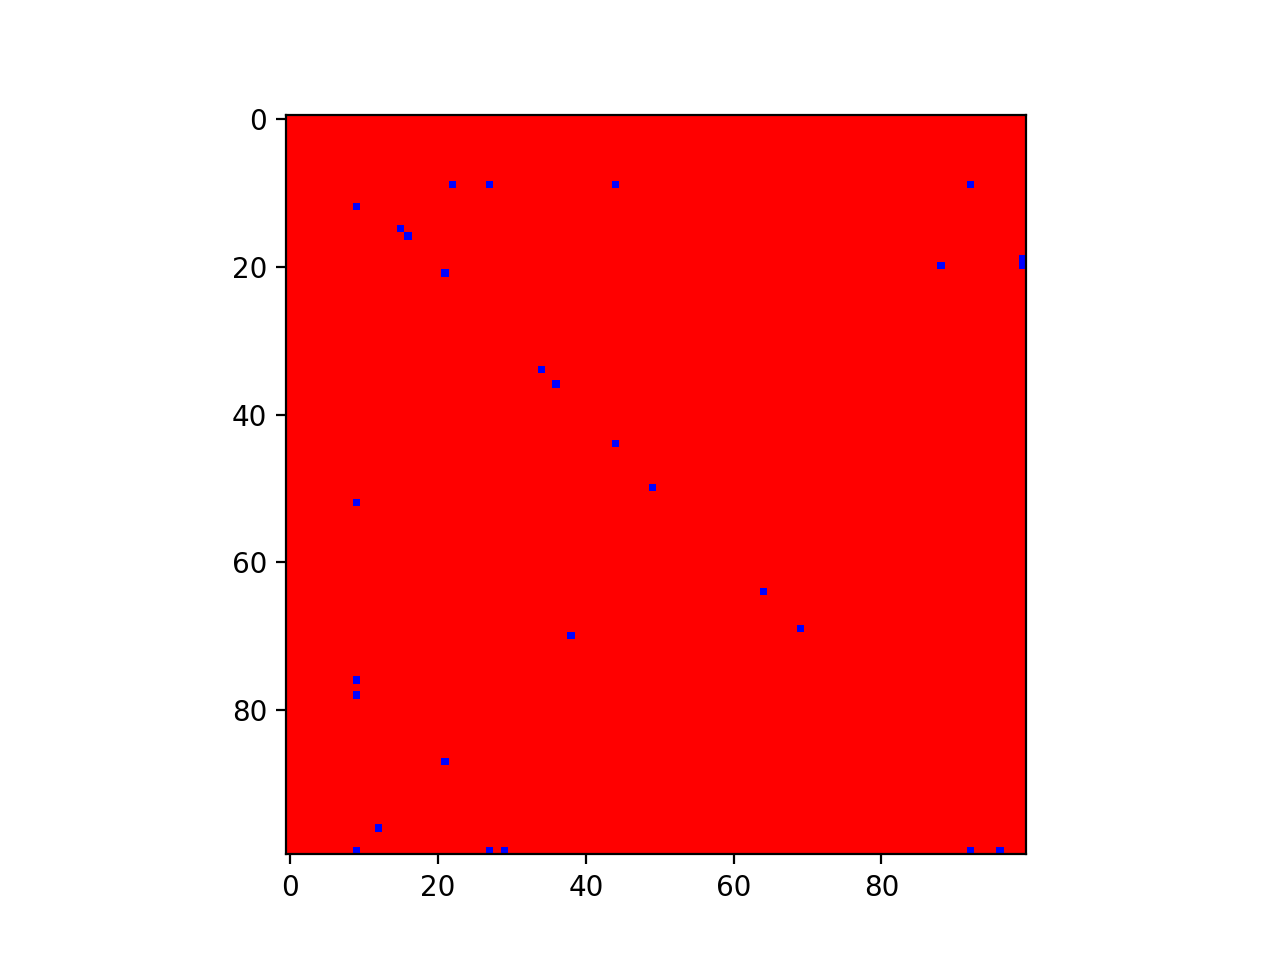

In [12]:
from matplotlib import pyplot as plt
from celluloid import Camera
from matplotlib import colors
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,.05,1]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots()
camera = Camera(fig)
for i in range(nstep):
    data = dats[i] 
    ax.imshow(data, cmap=cmap, norm=norm)
    camera.snap()
animation = camera.animate()

In [19]:
def populate2(df, vec,vec2):
    for i in range(len(vec2)):
        if vec2[i]==0:
            kk=np.array(vec[i]).tolist()
            x=int(max(0, kk[0]-1))
            y=int(max(0, kk[1]-1))
            df [x,y]=1
        else:
            kk=np.array(vec[i]).tolist()
            x=int(max(0, kk[0]-1))
            y=int(max(0, kk[1]-1))
            df [x,y]=10
    return df

In [20]:
dat=np.zeros((100,100))
dats=[]
for i in range(nstep):
    a=[j for j in range(0+(i*nagent),(nagent+(i*nagent)))]
    vec=agent_df["posl1"].values[a]
    vec2=agent_df["state"].values[a]
    dat=np.zeros((100,100))
    dats.append(populate2 (dat,vec,vec2))
    print (i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


<IPython.core.display.Javascript object>


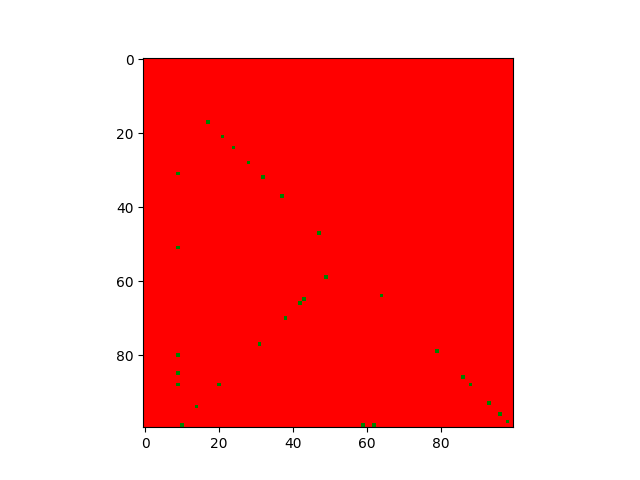

In [21]:

from matplotlib import pyplot as plt
from celluloid import Camera
from matplotlib import colors
cmap = colors.ListedColormap(['red', 'blue', "green"])
bounds = [0,0.5,1,10]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig, ax = plt.subplots()
camera = Camera(fig)
for i in range(nstep):
    data = dats[i] 
    ax.imshow(data, cmap=cmap, norm=norm)
    camera.snap()
animation = camera.animate()